<a href="https://colab.research.google.com/github/duybluemind1988/Data-science/blob/master/Analyze_bigdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
path1='/content/drive/My Drive/Data/Sonion/V04R-V04R-SQLData.dat' # 2gb
path2='/content/drive/My Drive/Data/loan.csv' # 1gb
path3='/content/drive/My Drive/Data/Instacart Market dataset/order_products__prior.csv' #500 mb

# Read csv by chunksize

1 000 000 000 bytes =
1000 megabytes

In [15]:
import psutil
import pandas as pd
import csv

svmem = psutil.virtual_memory()
print (svmem.available)
PATH = path2
df_sample = pd.read_csv(PATH, nrows=10)
df_sample_size = df_sample.memory_usage(index=True).sum()
print ('df_sample_size: ',df_sample_size)
print ('df_sample: ',df_sample)
# define a chunksize that would occupy a maximum of 1Gb
# we divide by 10 because we have selected 10 lines in our df_sample
my_chunk = (1000000000 / df_sample_size)/10
my_chunk = int(my_chunk//1) # we get the integer part ,  this is the chunk size of 1 line of data frame (bytes)
print (my_chunk)
# create the iterator
iter_csv = pd.read_csv(
    PATH,
    iterator=True,
    chunksize=my_chunk)


12695183360
df_sample_size:  448
df_sample:     order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0
5         2       17794                  6          1
6         2       40141                  7          1
7         2        1819                  8          1
8         2       43668                  9          0
9         3       33754                  1          1
223214


In [16]:
iter_csv

In [18]:
# concatenate according to a filter to our result dataframe
df_result = pd.concat( chunk for chunk in iter_csv)
print (df_result)

          order_id  product_id  add_to_cart_order  reordered
0                2       33120                  1          1
1                2       28985                  2          1
2                2        9327                  3          0
3                2       45918                  4          1
4                2       30035                  5          0
...            ...         ...                ...        ...
32434484   3421083       39678                  6          1
32434485   3421083       11352                  7          0
32434486   3421083        4600                  8          0
32434487   3421083       24852                  9          1
32434488   3421083        5020                 10          1

[32434489 rows x 4 columns]


In [19]:
df_result.shape

(32434489, 4)

In [24]:
def read_bigdata(path):
  svmem = psutil.virtual_memory()
  print (svmem.available)
  PATH = path
  df_sample = pd.read_csv(PATH, nrows=10)
  df_sample_size = df_sample.memory_usage(index=True).sum()
  print ('df_sample_size: ',df_sample_size)
  print ('df_sample: ',df_sample)
  # define a chunksize that would occupy a maximum of 1Gb
  # we divide by 10 because we have selected 10 lines in our df_sample
  my_chunk = (1000000000 / df_sample_size)/10
  my_chunk = int(my_chunk//1) # we get the integer part
  print ('my_chunk',my_chunk)
  # create the iterator
  iter_csv = pd.read_csv(PATH,iterator=True,chunksize=my_chunk)
  df_result = pd.concat( chunk for chunk in iter_csv)
  print(df_result.shape)
  print(df_result)
  return df_result

In [31]:
%time df_result=read_bigdata(path1)

9891028992
df_sample_size:  11728
df_sample:     id  member_id  ...  settlement_percentage  settlement_term
0 NaN        NaN  ...                    NaN              NaN
1 NaN        NaN  ...                    NaN              NaN
2 NaN        NaN  ...                    NaN              NaN
3 NaN        NaN  ...                    NaN              NaN
4 NaN        NaN  ...                    NaN              NaN
5 NaN        NaN  ...                    NaN              NaN
6 NaN        NaN  ...                    NaN              NaN
7 NaN        NaN  ...                    NaN              NaN
8 NaN        NaN  ...                    NaN              NaN
9 NaN        NaN  ...                    NaN              NaN

[10 rows x 145 columns]
my_chunk 8526


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DtypeWarning: Columns (139,140,141) have mixed types.Specify dtype option on import or set low_memory=False.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DtypeWarning: Columns (123,124,125,128,129,130,133) have mixed types.Specify dtype option on import or set low_memory=False.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DtypeWarning: Columns (123,124,125,128,129,130,133,139,140,141) have mixed types.Specify dtype option on import or set low_memory=False.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DtypeWarning: Columns (112) have mixed types.Specify dtype option on import or set low_memory=False.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memor

(2260668, 145)
         id  member_id  ...  settlement_percentage  settlement_term
0       NaN        NaN  ...                    NaN              NaN
1       NaN        NaN  ...                    NaN              NaN
2       NaN        NaN  ...                    NaN              NaN
3       NaN        NaN  ...                    NaN              NaN
4       NaN        NaN  ...                    NaN              NaN
...      ..        ...  ...                    ...              ...
2260663 NaN        NaN  ...                    NaN              NaN
2260664 NaN        NaN  ...                    NaN              NaN
2260665 NaN        NaN  ...                    NaN              NaN
2260666 NaN        NaN  ...                    NaN              NaN
2260667 NaN        NaN  ...                    NaN              NaN

[2260668 rows x 145 columns]
CPU times: user 47.2 s, sys: 6.22 s, total: 53.4 s
Wall time: 55.5 s


In [32]:
%time df_result2=read_bigdata(path2)

6891581440
df_sample_size:  448
df_sample:     order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0
5         2       17794                  6          1
6         2       40141                  7          1
7         2        1819                  8          1
8         2       43668                  9          0
9         3       33754                  1          1
my_chunk 223214
(32434489, 4)
          order_id  product_id  add_to_cart_order  reordered
0                2       33120                  1          1
1                2       28985                  2          1
2                2        9327                  3          0
3                2       45918                  4          1
4                2       30

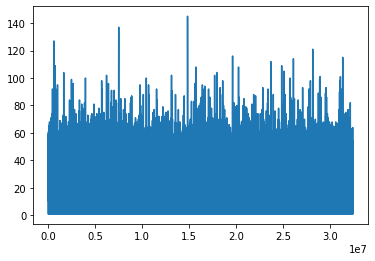

In [34]:
df_result2.add_to_cart_order.plot()

## ANOTHER SIMPLE WAY FOR CHUNK SIZE:

In [36]:
import pandas as pd

def readbigfile(name): 
    return pd.concat( 
       df[df["street"] == name] for df in 
       pd.read_csv("voters.csv", chunksize=1000) 
    ) 

# Fast subsets of large datasets with Pandas and SQLite

## Convert to SQLlite

Let’s say you have a large amount of data, too large to fit in memory, and you want to load part of it into Pandas. If you’re only going to load one specific subset a single time, you can use chunking.

But what if you need to load different subsets of the data at different times? Loading the whole file each time will be slow.

What you need is a searchable index, and one easy (and fast!) way to do that is with SQLite.

In [3]:
import pandas as pd
import numpy as np
import sqlite3

In [2]:
path1='/content/drive/My Drive/Data/Sonion/V04R-V04R-SQLData.dat' # 2gb
path2='/content/drive/My Drive/Data/loan.csv' # 1gb
path3='/content/drive/My Drive/Data/Instacart Market dataset/order_products__prior.csv' #500 mb

In [ ]:
# Create a new database file:
db = sqlite3.connect("voters.sqlite")

# Load the CSV in chunks:
for c in pd.read_csv(path2, chunksize=1000): #10,000 to 200,000
    # Append all rows to a new database table, which
    # we name 'voters':
    c.to_sql("voters", db, if_exists="append")

In [ ]:
# Add an index on the 'street' column:
db.execute("CREATE INDEX street ON voters(street)") 
db.close()

In [ ]:
def get_voters_for_street(street_name):
  conn = sqlite3.connect("voters.sqlite")
  q = "SELECT * FROM voters WHERE street = ?"
  values = (street_name,)
  return pd.read_sql_query(q, conn, values)

When you run this function, SQLite will load only those rows that match the query, and pass them to Pandas to turn into a DataFrame.

50x faster lookups

You’ll recall that with a CSV with 70,000 rows, our original approach took 574ms to lookup the voters for a particular street. Using our re-implemented version based on SQLite, it only takes 10ms.

That’s a 50× speed-up! That’s the benefit of only having to load only those rows we actually care about, instead of having to parse and filter every single row in the original CSV.

In [ ]:
# try to read db with large chunksize
db = sqlite3.connect("loan.sqlite")

# Load the CSV in chunks:
for c in pd.read_csv(path2, chunksize=200000): #10,000 to 200,000 (cu tang 200 mb 1 lan quet)
    # Append all rows to a new database table, which
    # we name 'voters':
    c.to_sql("loan", db, if_exists="append")

## Read sqllite

How to list tables in SQLite3 database in Python

Method 1: fast

In [10]:
import sqlite3

conn = sqlite3.connect('loan.sqlite')
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('loan',)]


Method 2: low

In [4]:
def tables_in_sqlite_db(conn):
    cursor = conn.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = [
        v[0] for v in cursor.fetchall()
        if v[0] != "sqlite_sequence"
    ]
    cursor.close()
    return tables

In [5]:
#!/usr/bin/env python3
import sqlite3
# Open database
conn = sqlite3.connect('/content/loan.sqlite')
# List tables
tables = tables_in_sqlite_db(conn)
# Your code goes here!
# Example:
print(tables) # prints ['commands', 'packages']

['loan']


How to list column name in table

In [ ]:
import sqlite3
connection = sqlite3.connect('/content/loan.sqlite')
cursor = connection.execute('select * from loan') # table name from above
names = list(map(lambda x: x[0], cursor.description))
names

Alternatively you could use a list comprehension:

In [20]:
names = [description[0] for description in cursor.description]
names

['index',
 'id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',


In [24]:
print(type(names)) # 1 dong
print(len(names)) # 1 dong co 146 column

<class 'list'>
146


Query data from sqlite

In [17]:
connection = sqlite3.connect('/content/loan.sqlite')
cur=connection.cursor()
cur.execute("SELECT * FROM loan LIMIT 20")
rows = cur.fetchall()
for row in rows:
  print(row)

(0, None, None, 2500, 2500, 2500.0, ' 36 months', 13.56, 84.92, 'C', 'C1', 'Chef', '10+ years', 'RENT', 55000.0, 'Not Verified', 'Dec-2018', 'Current', 'n', None, None, 'debt_consolidation', 'Debt consolidation', '109xx', 'NY', 18.24, 0, 'Apr-2001', 1, None, 45.0, 9, 1, 4341, 10.3, 34, 'w', 2386.02, 2386.02, 167.02, 167.02, 113.98, 53.04, 0.0, 0.0, 0.0, 'Feb-2019', 84.92, 'Mar-2019', 'Feb-2019', 0, None, 1, 'Individual', None, None, None, 0, 0, 16901, 2, 2, 1, 2, 2.0, 12560, 69.0, 2, 7, 2137, 28.0, 42000, 1, 11, 2, 9, 1878.0, 34360.0, 5.9, 0, 0, 140.0, 212, 1, 1, 0, 1.0, None, 2.0, None, 0, 2, 5, 3, 3, 16, 7, 18, 5, 9, 0.0, 0, 0, 3, 100.0, 0.0, 1, 0, 60124, 16901, 36500, 18124, None, None, None, None, None, None, None, None, None, None, None, 'N', None, None, None, None, None, None, None, None, None, None, None, None, None, None, 'Cash', 'N', None, None, None, None, None, None)
(1, None, None, 30000, 30000, 30000.0, ' 60 months', 18.94, 777.23, 'D', 'D2', 'Postmaster ', '10+ years', 'M

In [22]:
print(type(row)) # 1 dong
print(len(row)) # 1 dong co 146 column

<class 'tuple'>
146


Next we will print all rows from the cars table with their column names.

In [81]:
connection = sqlite3.connect('/content/loan.sqlite')
cur = connection.cursor()
cur.execute('SELECT * FROM loan LIMIT 10')
col_names = [cn[0] for cn in cur.description]
rows = cur.fetchall()
print(col_names)
#for name in col_names:
#  print('{:3}'.format(name))
for row in rows:
    print(row)

['index', 'id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m'

In [82]:
for name in col_names:
  print('{:3}'.format(name), sep='', end=' | ', flush=True) 

index | id  | member_id | loan_amnt | funded_amnt | funded_amnt_inv | term | int_rate | installment | grade | sub_grade | emp_title | emp_length | home_ownership | annual_inc | verification_status | issue_d | loan_status | pymnt_plan | url | desc | purpose | title | zip_code | addr_state | dti | delinq_2yrs | earliest_cr_line | inq_last_6mths | mths_since_last_delinq | mths_since_last_record | open_acc | pub_rec | revol_bal | revol_util | total_acc | initial_list_status | out_prncp | out_prncp_inv | total_pymnt | total_pymnt_inv | total_rec_prncp | total_rec_int | total_rec_late_fee | recoveries | collection_recovery_fee | last_pymnt_d | last_pymnt_amnt | next_pymnt_d | last_credit_pull_d | collections_12_mths_ex_med | mths_since_last_major_derog | policy_code | application_type | annual_inc_joint | dti_joint | verification_status_joint | acc_now_delinq | tot_coll_amt | tot_cur_bal | open_acc_6m | open_act_il | open_il_12m | open_il_24m | mths_since_rcnt_il | total_bal_il | il_util | o

In [106]:
for name in col_names:
  print('{:10}'.format(name), sep='', end=' | ', flush=True) 
for row in rows:
  print()
  for name in row:
    print('{:10}'.format(str(name)), sep='', end=' | ', flush=True) 

index      | id         | member_id  | loan_amnt  | funded_amnt | funded_amnt_inv | term       | int_rate   | installment | grade      | sub_grade  | emp_title  | emp_length | home_ownership | annual_inc | verification_status | issue_d    | loan_status | pymnt_plan | url        | desc       | purpose    | title      | zip_code   | addr_state | dti        | delinq_2yrs | earliest_cr_line | inq_last_6mths | mths_since_last_delinq | mths_since_last_record | open_acc   | pub_rec    | revol_bal  | revol_util | total_acc  | initial_list_status | out_prncp  | out_prncp_inv | total_pymnt | total_pymnt_inv | total_rec_prncp | total_rec_int | total_rec_late_fee | recoveries | collection_recovery_fee | last_pymnt_d | last_pymnt_amnt | next_pymnt_d | last_credit_pull_d | collections_12_mths_ex_med | mths_since_last_major_derog | policy_code | application_type | annual_inc_joint | dti_joint  | verification_status_joint | acc_now_delinq | tot_coll_amt | tot_cur_bal | open_acc_6m | open_act_il | open

# SQL to pandas Dataframe

In [1]:
import pandas as pd
import numpy as np
import sqlite3

In [11]:
connection = sqlite3.connect('/content/loan.sqlite')
cur = connection.cursor()

In [ ]:
limit_num=20
cur.execute('SELECT * FROM loan LIMIT 10000')
df=pd.DataFrame(cur.fetchall())
col_names = [cn[0] for cn in cur.description]
df.columns=col_names
df

Read_sql is very good for this task

In [15]:
def tables_in_sqlite_db(conn):
    cursor = conn.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = [
        v[0] for v in cursor.fetchall()
        if v[0] != "sqlite_sequence"
    ]
    cursor.close()
    return tables

For multy table name:

In [16]:

datapath='/content/loan.sqlite'
conn = sqlite3.connect(datapath)
# List tables
tables = tables_in_sqlite_db(conn)
# Your code goes here!
# Example:
print(tables) # prints ['commands', 'packages']

['loan']


Best code

In [38]:
datapath='/content/loan.sqlite'
conn = sqlite3.connect(datapath)
cursor = conn.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
table_name=cursor.fetchall()
table_name=table_name[0][0]
print('table_name: ',table_name)

cursor.execute("SELECT count(*) FROM %s" %table_name)
values = cursor.fetchone()
print ('number of rows: ',values[0])

limit=50
df = pd.read_sql("SELECT * FROM %s LIMIT %s" % (table_name,limit), conn)
print(df.shape)
df.head()

table_name:  loan
number of rows:  2260668
(50, 146)


,index,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,0,None,None,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,None,None,debt_consolidation,Debt consolidation,109xx,NY,18.24,0,Apr-2001,1,NaN,45.0,9,1,4341,10.3,34,w,2386.02,2386.02,167.02,...,1,0,60124,16901,36500,18124,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Cash,N,None,None,None,None,None,None
1,1,None,None,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,None,None,debt_consolidation,Debt consolidation,713xx,LA,26.52,0,Jun-1987,0,71.0,75.0,13,1,12315,24.2,44,w,29387.75,29387.75,1507.11,...,1,0,372872,99468,15000,94072,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Cash,N,None,None,None,None,None,None
2,2,None,None,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,None,None,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-2011,0,NaN,NaN,8,0,4599,19.1,13,w,4787.21,4787.21,353.89,...,0,0,136927,11749,13800,10000,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Cash,N,None,None,None,None,None,None
3,3,None,None,4000,4000,4000.0,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,MORTGAGE,92000.0,Source Verified,Dec-2018,Current,n,None,None,debt_consolidation,Debt consolidation,985xx,WA,16.74,0,Feb-2006,0,NaN,NaN,10,0,5468,78.1,13,w,3831.93,3831.93,286.71,...,0,0,385183,36151,5000,44984,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Cash,N,None,None,None,None,None,None
4,4,None,None,30000,30000,30000.0,60 months,16.14,731.78,C,C4,Mechanic,10+ years,MORTGAGE,57250.0,Not Verified,Dec-2018,Current,n,None,None,debt_consolidation,Debt consolidation,212xx,MD,26.35,0,Dec-2000,0,NaN,NaN,12,0,829,3.6,26,w,29339.02,29339.02,1423.21,...,0,0,157548,29674,9300,32332,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Cash,N,None,None,None,None,None,None


In [27]:
df.columns

Index(['index', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=146)

In [31]:
limit=30000
df = pd.read_sql("SELECT * FROM %s LIMIT %s" % (table_name,limit), conn)
print(df.shape)
df.head()

(30000, 146)


,index,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,0,None,None,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,None,None,debt_consolidation,Debt consolidation,109xx,NY,18.24,0,Apr-2001,1,NaN,45.0,9,1,4341,10.3,34,w,2386.02,2386.02,167.02,...,1,0,60124,16901,36500,18124,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Cash,N,None,None,None,None,None,None
1,1,None,None,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,None,None,debt_consolidation,Debt consolidation,713xx,LA,26.52,0,Jun-1987,0,71.0,75.0,13,1,12315,24.2,44,w,29387.75,29387.75,1507.11,...,1,0,372872,99468,15000,94072,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Cash,N,None,None,None,None,None,None
2,2,None,None,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,None,None,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-2011,0,NaN,NaN,8,0,4599,19.1,13,w,4787.21,4787.21,353.89,...,0,0,136927,11749,13800,10000,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Cash,N,None,None,None,None,None,None
3,3,None,None,4000,4000,4000.0,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,MORTGAGE,92000.0,Source Verified,Dec-2018,Current,n,None,None,debt_consolidation,Debt consolidation,985xx,WA,16.74,0,Feb-2006,0,NaN,NaN,10,0,5468,78.1,13,w,3831.93,3831.93,286.71,...,0,0,385183,36151,5000,44984,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Cash,N,None,None,None,None,None,None
4,4,None,None,30000,30000,30000.0,60 months,16.14,731.78,C,C4,Mechanic,10+ years,MORTGAGE,57250.0,Not Verified,Dec-2018,Current,n,None,None,debt_consolidation,Debt consolidation,212xx,MD,26.35,0,Dec-2000,0,NaN,NaN,12,0,829,3.6,26,w,29339.02,29339.02,1423.21,...,0,0,157548,29674,9300,32332,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Cash,N,None,None,None,None,None,None


number of rows:  2260668
